The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
current_solution 74867.0


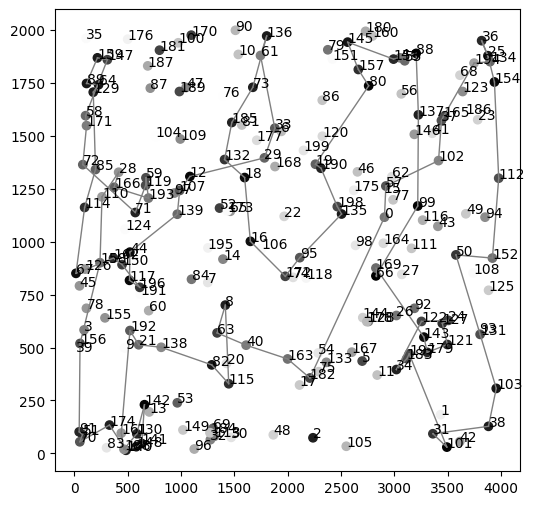

yeas
50  ->  125
current_solution 74465.0
yeas
31  ->  42
current_solution 74199.0
yeas
8  ->  20
current_solution 73943.0
yeas
145  ->  160
current_solution 73774.0
yeas
88  ->  56
current_solution 73638.0
yeas
80  ->  120
current_solution 73502.0
yeas
182  ->  98
current_solution 73377.0
yeas
67  ->  126
current_solution 73259.0
yeas
34  ->  92
current_solution 73161.0
yeas
163  ->  118
current_solution 73068.0
yeas
102  ->  41
current_solution 72975.0
yeas
99  ->  146
current_solution 72890.0
yeas
66  ->  164
current_solution 72821.0
yeas
169  ->  27
current_solution 72718.0
yeas
164  ->  111
current_solution 72592.0
yeas
192  ->  9
current_solution 72531.0
yeas
172  ->  106
current_solution 72474.0
yeas
101  ->  1
current_solution 72417.0
yeas
57  ->  77
current_solution 72366.0
yeas
132  ->  81
current_solution 72316.0


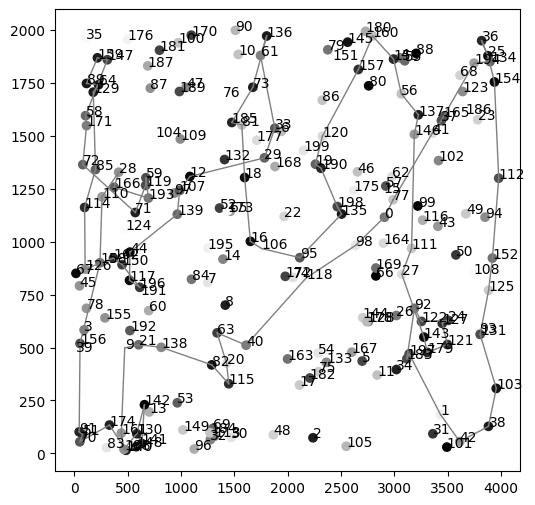

yeas
174  ->  83
current_solution 72266.0
yeas
29  ->  132
current_solution 72219.0
yeas
33  ->  76
current_solution 72059.0
yeas
160  ->  80
current_solution 72015.0
yeas
40  ->  74
current_solution 71972.0


KeyboardInterrupt: 

In [32]:
import random
import numpy as np
from modify_utils import *
%load_ext autoreload
%autoreload 2

random.seed(3)
 

def hill_climbing(data, starting = 'Random', alg_type = 'steepest', node_type = 'inner'): #node_type outer
    # Initialization
    NR_NODES = len(data)
    HALF_NODES = round(NR_NODES/2)
    all_indexes = np.arange(NR_NODES)
    node_distances, cost_list = create_dist_matrix_and_cost(data, infinity = True)

    # Generate an initial solution
    if starting =='Random':
        random.shuffle(all_indexes)
        current_solution = all_indexes[:HALF_NODES]  
    elif starting =='Best':
        current_solution = get_best_solution_for_D()   
    
    unvisited = all_indexes[~np.isin(all_indexes, current_solution)]
    current_cost = objective_function(current_solution, node_distances, cost_list)

    i = 0
    # Iterative process
    while True:
        print("current_solution", current_cost)
        if i%20==0: 
            plotMap(data, edges = [], tour = current_solution, colors = False, cost = True)

        # Neighbor generation
        if alg_type == 'steepest':
            if node_type == "inner":
                best_neighbor, neighbor_cost = min_swap_inter_nodes(current_solution, node_distances, cost_list) #best_neighbor  = (index of node_1 in solution, index of node_2 in solution)
            elif node_type =='outer':
                best_neighbor, neighbor_cost = min_swap_outer_nodes(current_solution, unvisited, node_distances, cost_list, NR_NODES) #best_neighbor  = (index of node_1 in solution, index of node_2 from unvisited)
        # Comparison
        if neighbor_cost < current_cost:
            print('yeas')
            if node_type == 'inner':
                current_solution = apply_swap_inter_nodes(*best_neighbor, current_solution)
            if node_type =='outer':
                current_solution, unvisited = apply_swap_outer_nodes(*best_neighbor, unvisited, current_solution)
            current_cost = neighbor_cost
        else:
            break  # Terminate if no better solution is found
        i+=1
    return current_solution, current_cost



data = get_data('TSPD.csv')
# data = np.array([(0, 0, 0), (1, 2, 0), (2, 4, 0), (3, 1, 0), (7, 3, 0), (2,5, 0), (4,4, 0)]) * 10
# for i in data:
#     i[2]=0
# Usage example
best_solution, best_cost = hill_climbing(data, starting= "Best",node_type='outer')
print("Best Solution:", best_solution)
print("Best cost:", best_cost)
plotMap(data, edges = [], tour = best_solution, colors = False, cost = True)
